In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

## Seleccionar atributos numéricos

In [2]:
file = "/home/cosmocicatais/Documents/Teodoro_dosis/CARDIOLOGIA DF_H.csv"
#data = pd.read_csv(file, usecols={'EDAD','PESO', 'GENERO','TALLA', 'TIEMPO','mGy','pGym','IMÁGENES','CUADROS POR SEGUNDO','PULSOS POR SEGUNDO', 'CONTRASTE'})
data = pd.read_csv(file, usecols={'EDAD','PESO', 'TALLA', 'TIEMPO','mGy','pGym', 'IMÁGENES'})

In [3]:
data.head()

,EDAD,PESO,TALLA,TIEMPO,mGy,pGym,IMÁGENES
0,75,72.0,1.60,3.25,85.0,4209.9,3
1,49,78.0,1.68,7.60,1301.0,8858.6,18
2,78,60.0,1.58,10.04,128.0,6979.5,5
3,48,115.0,1.70,30.60,1906.0,22416.8,13
4,81,80.0,1.76,2.45,206.0,1026.5,11


In [4]:
type(data)
data.isin(['NaN']).any()

EDAD        False
PESO        False
TALLA       False
TIEMPO      False
mGy         False
pGym        False
IMÁGENES    False
dtype: bool

In [5]:
nparray = data.values
len(nparray)

593

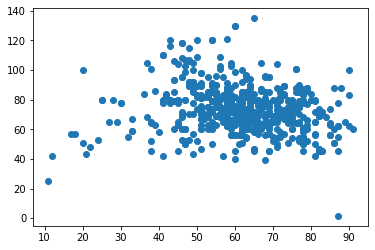

In [44]:
pesoCD = pd.read_csv(file, usecols={'EDAD','PESO', 'TALLA', 'TIEMPO','mGy','pGym', 'IMÁGENES'})
pesoscd_val = pesoCD.values
plt.scatter(pesoscd_val[:,0],pesoscd_val[:,1])

Text(336.9714285714286, 0.5, 'EDAD')

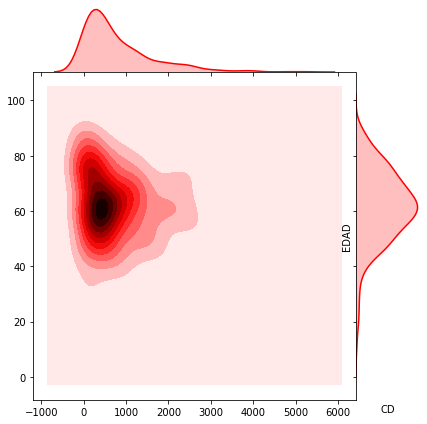

In [48]:
import seaborn as sns
sns.jointplot(pesoscd_val[:,4],pesoscd_val[:,0], kind="kde", space=0, color="r", cbar=False)
plt.xlabel("CD")
plt.ylabel("EDAD")

Text(336.9714285714286, 0.5, 'PESO')

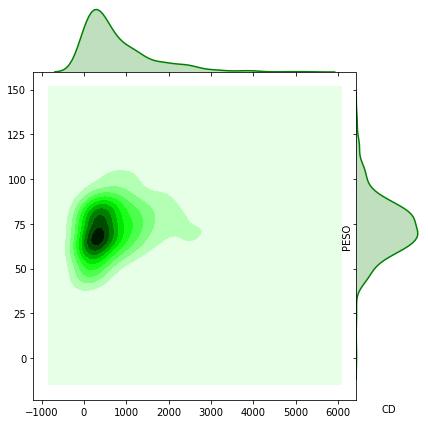

In [49]:
sns.jointplot(pesoscd_val[:,4],pesoscd_val[:,1], kind="kde", space=0, color="g", cbar=False)
plt.xlabel("CD")
plt.ylabel("PESO")

Text(336.9714285714286, 0.5, 'TALLA')

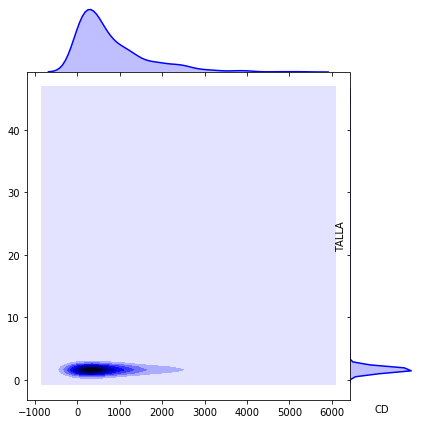

In [57]:
sns.jointplot(pesoscd_val[:,4],pesoscd_val[:,2], kind="kde", space=0, color="b", cbar=False)
plt.xlabel("CD")
plt.ylabel("TALLA")

Text(336.9714285714286, 0.5, 'TIEMPO')

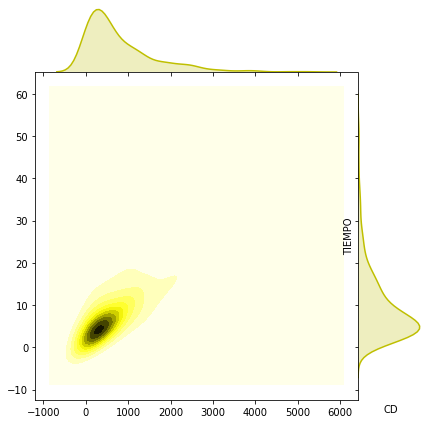

In [58]:
sns.jointplot(pesoscd_val[:,4],pesoscd_val[:,3], kind="kde", space=0, color="y", cbar=False)
plt.xlabel("CD")
plt.ylabel("TIEMPO")

Text(336.9714285714286, 0.5, 'PDA')

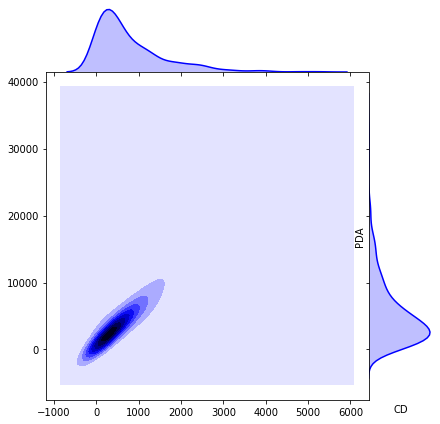

In [59]:
sns.jointplot(pesoscd_val[:,4],pesoscd_val[:,5], kind="kde", space=0, color="b", cbar=False)
plt.xlabel("CD")
plt.ylabel("PDA")

Text(336.9714285714286, 0.5, 'IMAGENES')

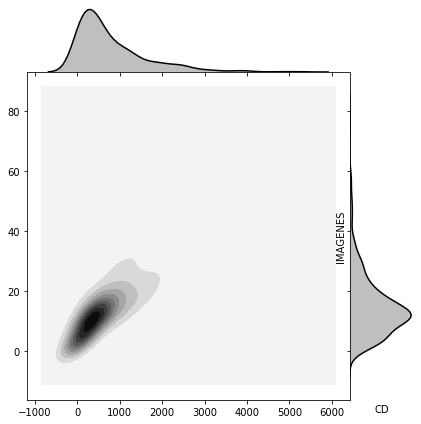

In [60]:
sns.jointplot(pesoscd_val[:,4],pesoscd_val[:,6], kind="kde", space=0, color="k", cbar=False)
plt.xlabel("CD")
plt.ylabel("IMAGENES")

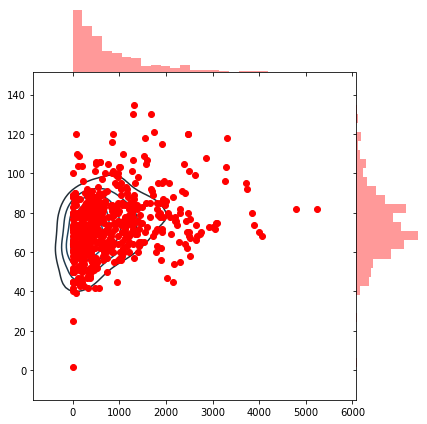

In [24]:
sns.jointplot(pesoscd_val[:,1],pesoscd_val[:,0],data = data, space=0, color="r").plot_joint(sns.kdeplot, zorder=0, n_levels=6)

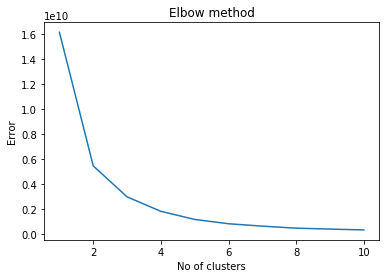

In [86]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(nparray)
    kmeans.fit(nparray)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [87]:
kmeans3= KMeans(n_clusters=4)
y_kmeans3 = kmeans3.fit_predict(nparray)
print(y_kmeans3)

kmeans3.cluster_centers_

[0 1 1 2 0 0 0 0 1 1 1 1 1 3 1 1 1 0 0 0 1 3 3 1 1 3 0 1 3 3 0 0 3 3 0 1 3
 3 0 1 1 0 0 3 1 3 3 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 3 1 3 1 1 3 0 0 3
 3 0 1 0 1 0 0 0 0 1 3 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 3 0 0 1 3 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 2 0 3 0 0 3 0 0 0 3 3 0 0 1 0 3 0 0 0 1 0 0
 0 0 1 1 1 0 1 0 3 0 0 3 0 1 3 3 3 0 1 3 3 0 1 0 0 0 3 2 1 0 1 1 3 3 0 1 1
 1 0 1 0 0 0 0 0 3 0 0 0 2 0 1 1 1 3 0 0 1 0 2 3 0 1 1 0 2 0 0 3 0 0 1 1 1
 0 0 3 1 0 0 0 1 0 0 0 3 0 1 0 3 0 1 0 3 1 0 0 1 0 0 0 0 0 0 0 0 0 1 3 1 1
 0 0 0 0 1 1 1 1 1 0 3 1 0 0 0 1 1 1 1 3 0 1 0 0 0 1 3 1 1 0 0 0 0 0 2 0 1
 0 0 0 1 3 3 0 0 1 0 0 1 0 1 0 1 3 3 1 3 0 0 1 3 0 0 0 0 0 3 0 0 0 0 3 0 0
 3 0 1 0 1 2 0 0 0 0 0 3 0 0 0 1 0 0 0 1 0 3 0 0 0 1 1 0 0 0 1 0 3 0 0 3 0
 3 3 0 0 0 0 3 1 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 1 3 0 0 0 3 0 0 1 1 0 0 1
 1 1 1 0 0 3 0 1 3 3 0 1 1 1 0 3 1 0 1 3 1 0 0 0 0 3 0 1 3 1 1 0 0 0 0 0 1
 0 0 0 1 3 1 3 0 0 3 0 2 1 2 3 0 1 1 0 1 0 0 0 0 1 3 2 1 0 1 3 1 1 3 0 3 0
 0 0 0 0 1 0 0 1 0 0 3 1 

array([[6.23664596e+01, 6.90015528e+01, 1.75649068e+00, 5.34726708e+00,
        3.00029193e+02, 2.13952919e+03, 1.05527950e+01],
       [6.08622754e+01, 7.60838323e+01, 1.64844311e+00, 1.11271856e+01,
        9.21310180e+02, 6.41398862e+03, 1.80778443e+01],
       [5.60666667e+01, 9.03333333e+01, 1.64133333e+00, 2.82013333e+01,
        3.01126667e+03, 2.43183133e+04, 3.02666667e+01],
       [6.04382022e+01, 8.24044944e+01, 1.66415730e+00, 2.00452809e+01,
        1.95921348e+03, 1.29902180e+04, 2.47191011e+01]])

In [91]:
print(data.head())
for i, item in enumerate(kmeans3.cluster_centers_):
    print("Centro del centroide No {} es: \n {} \n".format(i, item))

   EDAD   PESO  TALLA  TIEMPO     mGy     pGym  IMÁGENES
0    75   72.0   1.60    3.25    85.0   4209.9         3
1    49   78.0   1.68    7.60  1301.0   8858.6        18
2    78   60.0   1.58   10.04   128.0   6979.5         5
3    48  115.0   1.70   30.60  1906.0  22416.8        13
4    81   80.0   1.76    2.45   206.0   1026.5        11
Centro del centroide No 0 es: 
 [6.23664596e+01 6.90015528e+01 1.75649068e+00 5.34726708e+00
 3.00029193e+02 2.13952919e+03 1.05527950e+01] 

Centro del centroide No 1 es: 
 [6.08622754e+01 7.60838323e+01 1.64844311e+00 1.11271856e+01
 9.21310180e+02 6.41398862e+03 1.80778443e+01] 

Centro del centroide No 2 es: 
 [5.60666667e+01 9.03333333e+01 1.64133333e+00 2.82013333e+01
 3.01126667e+03 2.43183133e+04 3.02666667e+01] 

Centro del centroide No 3 es: 
 [6.04382022e+01 8.24044944e+01 1.66415730e+00 2.00452809e+01
 1.95921348e+03 1.29902180e+04 2.47191011e+01] 



In [89]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = kmeans3.labels_
cluster1 = cluster_map[cluster_map.cluster == 0]
cluster2 = cluster_map[cluster_map.cluster == 1]
cluster3 = cluster_map[cluster_map.cluster == 2]
cluster4 = cluster_map[cluster_map.cluster == 3]

In [90]:
print("c1 {}".format(len(cluster1)))
print("c2 {}".format(len(cluster2)))
print("c3 {}".format(len(cluster3)))
print("c4 {}".format(len(cluster4)))
cluster3

c1 322
c2 167
c3 15
c4 89


,data_index,cluster
3,3,2
126,126,2
175,175,2
197,197,2
207,207,2
213,213,2
293,293,2
338,338,2
383,383,2
390,390,2


In [53]:
print(len(cluster2))
print(len(cluster3))
print(len(cluster4))

0
0
0


In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(nparray)
nparray = pca.transform(nparray)
for element in nparray:
    print(element)


[-1406.77925248   521.47619896     6.97333702]
[3364.00339452  -52.03607789   -5.97857261]
[1343.00067118  854.81646016   24.52734225]
[16878.82841619  1189.61323197   -17.27882189]
[-4.54424785e+03 -3.07266863e+01 -3.99426922e+00]
[-2787.9234934     98.08449798   -24.04535699]
[-4068.80330695    51.63233549   -13.45347735]
[-4347.29698365   180.96712735    13.8554818 ]
[3.28594947e+03 1.09700271e+03 3.26622774e+00]
[-983.45504432 -318.03179916   -6.52059725]
[2921.82435783  -79.56771319    3.54010855]
[-330.33792409  652.84108667    2.22865529]
[-629.03367892   31.44640992    1.57487334]
[4800.25576421  148.98041044  -30.61958569]
[-460.24750426  -21.09888172    8.59769422]
[-529.73767504  -26.49369707   -1.49968065]
[-270.82267129  664.08977265    7.97352367]
[-3498.34026136    96.41380737     6.77579957]
[-3703.95944023    64.2751127     -4.35193248]
[-2711.54668931    86.19687366    -6.02890047]
[  93.64355784 -223.08222942  -18.12616776]
[9943.52059756  234.00729073  -13.71742648]

In [57]:
print(pca.score(nparray))
print(pca.components_)
print(pca.explained_variance_)

-21.565895050270427
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  8.88178420e-16]
 [ 0.00000000e+00 -5.55111512e-16  1.00000000e+00]]
[2.71565378e+07 1.74363829e+05 2.29795590e+02]


In [58]:
principalDf = pd.DataFrame(data = nparray
             , columns = ['principal component 1', 'principal component 2',  'principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,-1406.779252,521.476199,6.973337
1,3364.003395,-52.036078,-5.978573
2,1343.000671,854.816460,24.527342
3,16878.828416,1189.613232,-17.278822
4,-4544.247853,-30.726686,-3.994269
...,...,...,...
588,15468.652363,1221.467517,-28.714001
589,-3256.218319,-79.212105,-11.070524
590,-2768.036949,-449.338014,-13.374064
591,-1823.449289,103.809852,17.276455


In [59]:
n_samples = nparray.shape[0]
# We center the data and compute the sample covariance matrix.
X_centered = nparray - np.mean(nparray, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

27110742.637934327
27156537.811309215
174069.7924839085
174363.8292955368
229.4080767631498
229.79559040633097


In [60]:
#kmeans2 = KMeans(n_clusters=2, random_state=0).fit(nparray)
leng = len(nparray)
print(np.min(nparray), np.max(nparray))
print(np.shape(nparray))
#plt.scatter(nparray)

-5535.223150968142 28484.617682157863
(593, 3)


In [61]:
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(nparray)
print(y_kmeans2)

kmeans2.cluster_centers_

[0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 

array([[-2.15195759e+03,  1.11417784e+01, -2.23855381e-01],
       [ 8.39441308e+03, -4.34621440e+01,  8.73220989e-01]])

In [62]:
kmeans2.cluster_centers_

array([[-2.15195759e+03,  1.11417784e+01, -2.23855381e-01],
       [ 8.39441308e+03, -4.34621440e+01,  8.73220989e-01]])

### Elbow method sugiere k =3 

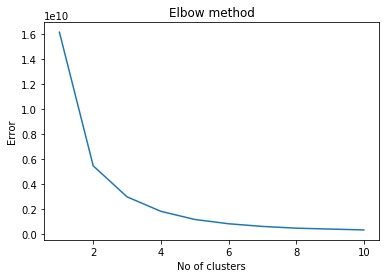

In [63]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(nparray)
    kmeans.fit(nparray)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [65]:
kmeans3= KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(nparray)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 0 0 2 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2 0 0 2 1 0 2 2 1 1 2 2 1 0 2
 0 1 0 0 1 1 2 0 0 2 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0
 2 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 2 1 2 1 1 0 1 1 1 0 2 1 1 0 1 2 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 2 1 1 0 1 1 2 2 2 1 1 0 0 1 0 1 1 1 2 2 0 1 0 0 0 2 1 0 0
 0 1 1 1 1 1 1 1 0 1 1 1 2 1 0 0 0 2 1 1 1 1 2 2 1 0 0 1 2 1 1 2 1 1 0 0 0
 1 1 0 1 1 1 1 0 1 1 1 2 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 2 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 2 1 0
 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 2 1 1 1 0 2 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 2 1
 2 2 1 1 1 1 0 0 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 0 0 2 1 0 0 0 1 0 0 1 0 2 0 1 1 1 1 2 1 0 2 0 0 1 1 1 1 1 0
 1 1 1 0 0 0 0 1 1 2 1 2 0 2 2 1 0 1 1 0 1 1 1 1 0 0 2 0 1 0 0 0 1 0 1 0 1
 1 1 1 1 0 1 1 0 1 1 2 0 

array([[ 2.59311917e+03, -7.72578282e+01, -1.19674568e+00],
       [-3.11240278e+03,  2.92879351e+01,  3.91397815e-01],
       [ 1.23216164e+04,  4.63973241e+01,  1.12464384e+00]])

In [66]:
for i, item in enumerate(kmeans3.cluster_centers_):
    print("Centro del centroide No {} es: \n {} \n".format(i+1, item))

Centro del centroide No 1 es: 
 [ 2.59311917e+03 -7.72578282e+01 -1.19674568e+00] 

Centro del centroide No 2 es: 
 [-3.11240278e+03  2.92879351e+01  3.91397815e-01] 

Centro del centroide No 3 es: 
 [1.23216164e+04 4.63973241e+01 1.12464384e+00] 



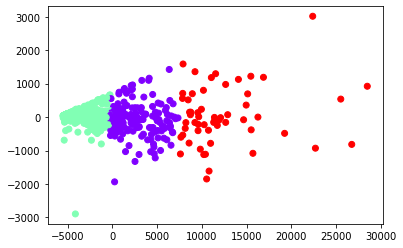

In [67]:
plt.scatter(nparray[:,0],nparray[:,1],c=y_kmeans3,cmap='rainbow') 

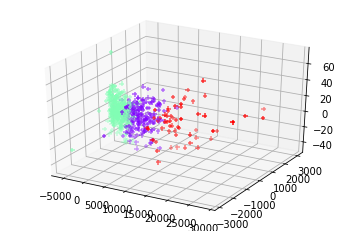

In [68]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nparray[:,0],nparray[:,1], nparray[:,2], marker='+', c=y_kmeans3, cmap='rainbow')

In [69]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = kmeans3.labels_
cluster1 = cluster_map[cluster_map.cluster == 1]
cluster2 = cluster_map[cluster_map.cluster == 2]
cluster3 = cluster_map[cluster_map.cluster == 3]
#cluster4 = cluster_map[cluster_map.cluster == 4]
print(len(cluster1))
print(len(cluster2))
print(len(cluster3))
print(len(cluster4))

365
56
0
0
